In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8) 
pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

# Pair Programming Encoding

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:

- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming.

In [2]:
df = pd.read_pickle('../archivos/coste_vida_estandar.pkl')
df.head()

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,South Korea,16.684542,182.13,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,0.504901,-0.338160,-0.153846,-0.258103,0.245902,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125
1,China,10.443987,66.00,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,-0.462312,-0.319477,-0.408284,-0.691550,-0.131148,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580
2,China,9.945543,59.65,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,-0.454115,-0.293321,-0.532544,-0.744625,-0.147541,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119
3,India,8.515986,43.57,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,0.627852,-0.181224,-0.597633,-0.797701,0.114754,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674
4,India,9.816500,58.07,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,0.029491,-0.181224,-0.455621,-0.877313,-0.065574,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005


La única variable categórica con que contamos en nuestro dataframe es la columna 'country'.

Para elegir el método por el cual hacer el encoding necesitamos determinar si se trata de una variable con orden o sin orden. Para ello nos ayudaremos de gráficas y de calculos matemáticos apra determinar los pesos de cada pais.

<Axes: xlabel='basic', ylabel='country'>

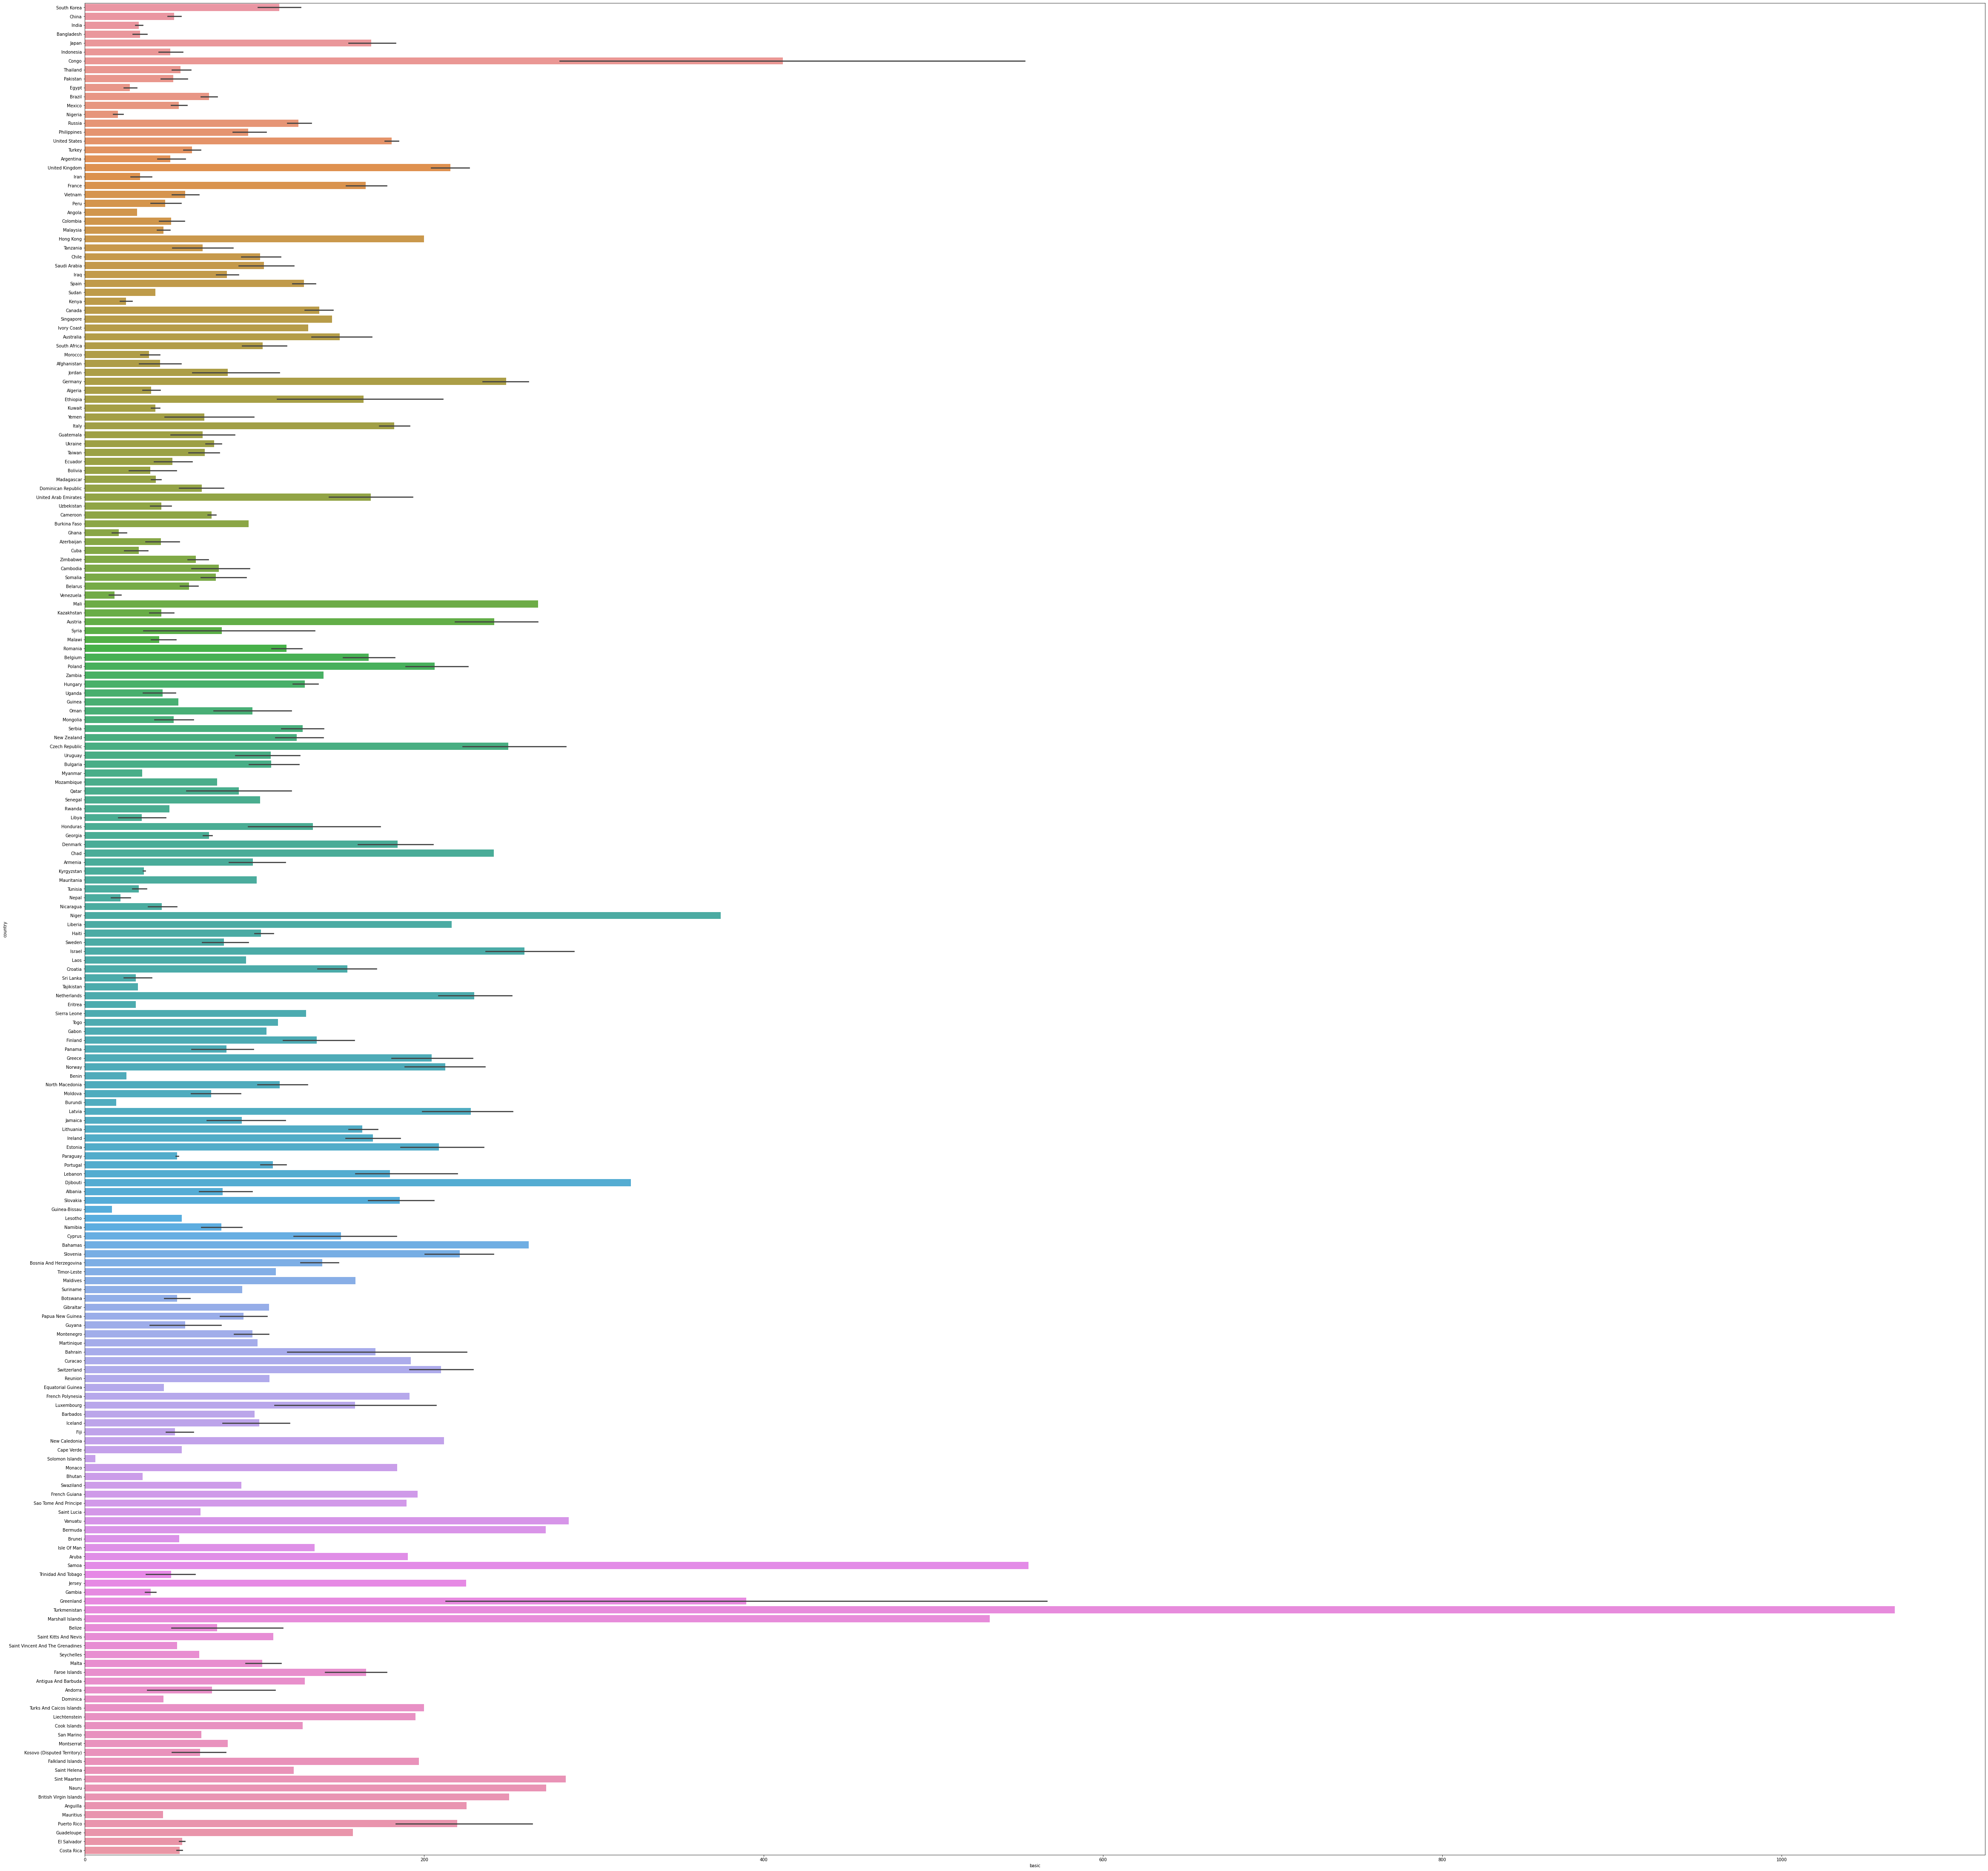

In [3]:
plt.figure(figsize=(80,80))
sns.barplot(x = 'basic', data = df, y = 'country')

<Axes: xlabel='basic_boxcox', ylabel='country'>

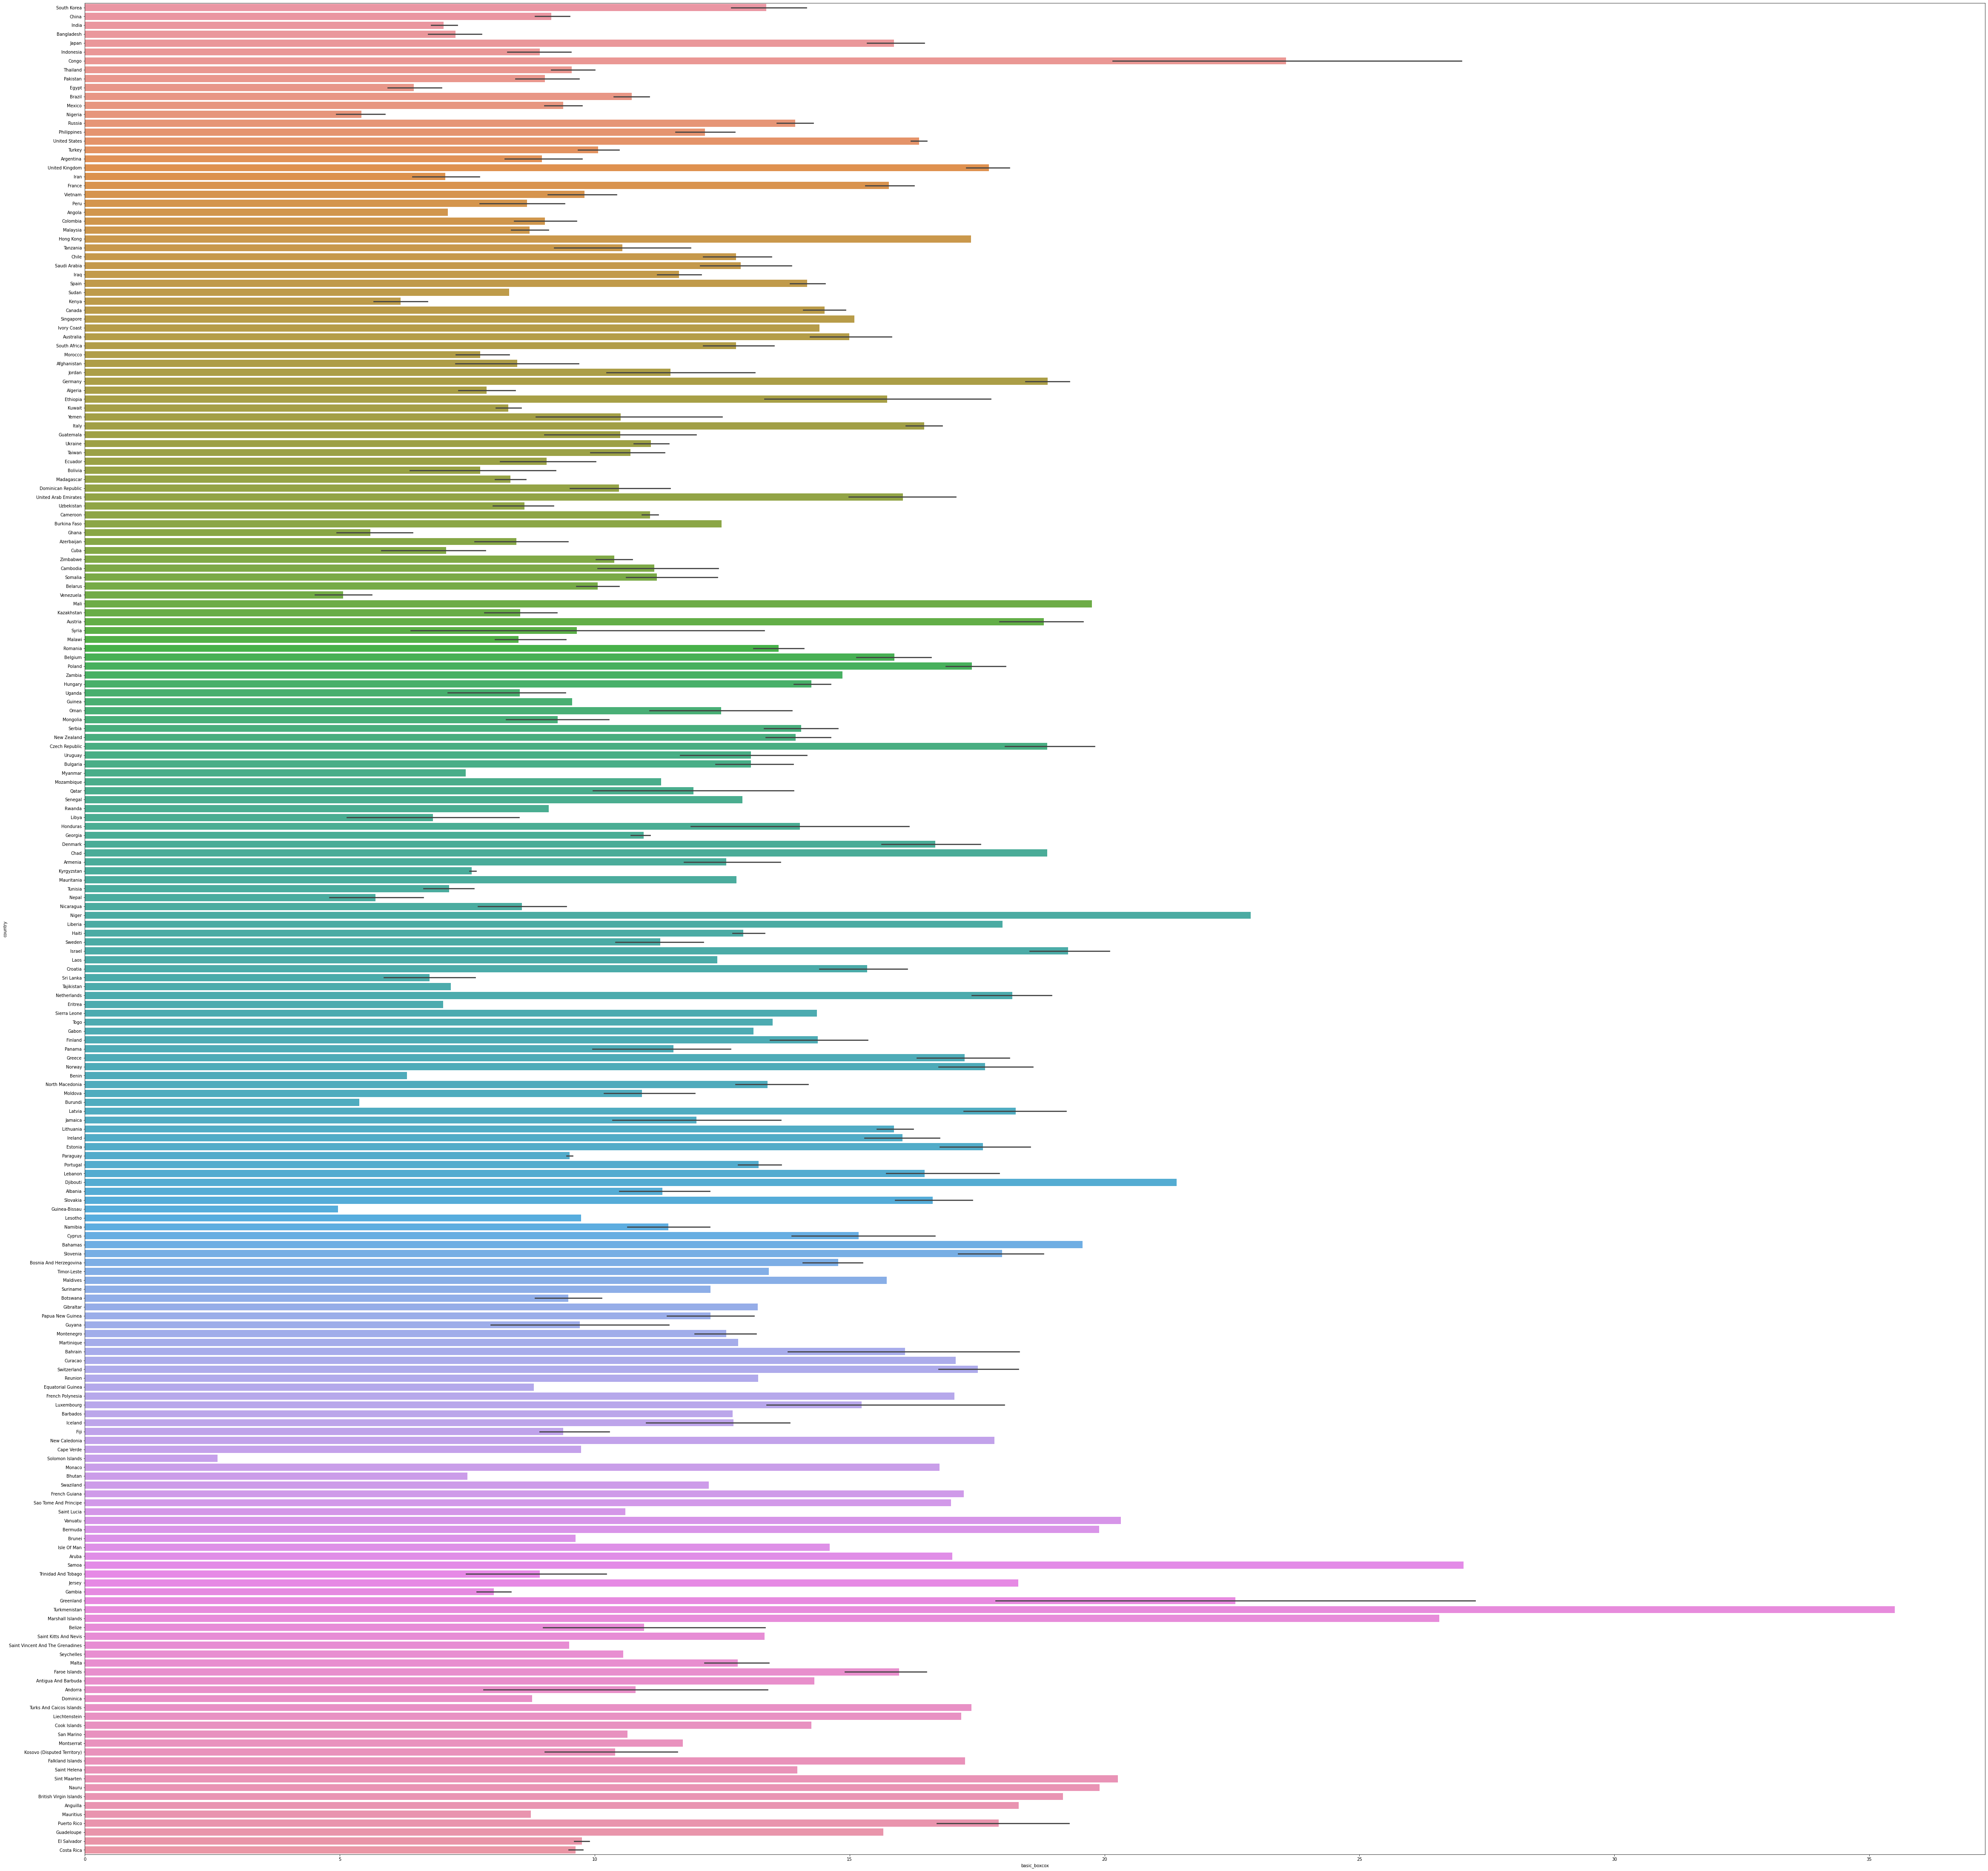

In [4]:
plt.figure(figsize=(80,80))
sns.barplot(x = 'basic_boxcox', data = df, y = 'country')

In [5]:
country_basic = (pd.DataFrame(df.groupby('country')['basic'].mean())).reset_index()

In [6]:
country_basic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Chad,Chile,China,Colombia,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Faroe Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle Of Man,Israel,Italy,Ivory Coast,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kosovo (Disputed Territory),Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts And Nevis,Saint Lucia,Saint Vincent And The Grenadines,Samoa,San Marino,Sao Tome And Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
basic,44.245,81.174667,39.169,75.01,30.78,225.0,129.51,50.447368,98.995,190.43,150.33,241.24,44.712,261.63,171.273333,32.468,100.0,61.490909,167.371622,77.89,24.6,271.65,34.04,38.566667,139.970769,54.405,73.073916,250.0,55.74,109.875517,96.39,18.43,78.946,74.806667,138.061739,57.06,240.96,103.259091,52.495789,50.927692,411.33,128.28,55.83,154.721818,31.676667,192.0,150.871429,249.585946,184.311,321.875,46.25,68.855455,51.573846,26.486,57.26,46.59,30.0,208.565833,164.165,196.8,165.756667,53.22,136.631852,165.533407,196.17,191.33,107.09,38.78,73.07625,248.382701,20.0825,108.5,204.398,389.82,158.06,69.364,55.0,16.06,59.145,103.7,134.376,199.78,129.540238,102.726667,31.86396,50.402353,32.442414,83.802632,169.885455,135.51,259.192353,182.195063,131.53,92.605,168.647246,224.76,84.271429,45.113333,24.223636,67.871429,41.54,34.746667,95.0,227.407333,179.728333,57.03,216.1,33.459,194.84,163.523684,159.25,41.925,43.816667,46.326,159.57,267.24,104.580882,533.33,101.86,101.31,46.01,55.312949,74.515,184.18,52.47,98.758182,84.18,37.772333,77.9,33.75,80.525,271.83,21.092,229.5576,211.78,124.88875,45.23625,374.83,19.421818,114.925909,212.462917,98.812,52.005789,83.54,93.4625,54.382,47.251333,96.339459,206.097018,110.78,219.458182,90.74,1

In [7]:
country_basic.describe()

,basic
count,208.000000
mean,123.476962
std,109.516157
min,6.070000
25%,54.007500
50%,98.785091
75%,167.645216
max,1066.670000


In [8]:
p_bajo = []
p_medio = []
p_alto = []

for index, cuenta in country_basic.iterrows():
    if cuenta[1] <= 51:
        p_bajo.append(cuenta[0])
    elif 69 > cuenta[1] <= 278:
        p_medio.append(cuenta[0])
    else:
        p_alto.append(cuenta[0])


In [9]:
len(p_bajo)

47

In [10]:
df[df['country'].isin(p_bajo)]

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
3,India,8.515986,43.57,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,0.627852,-0.181224,-0.597633,-0.797701,0.114754,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674
4,India,9.816500,58.07,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,0.029491,-0.181224,-0.455621,-0.877313,-0.065574,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005
5,Bangladesh,7.844334,37.06,-0.581197,-0.314815,-0.458333,-0.595376,-0.666667,-0.618182,-0.484554,-0.555160,-0.549451,-0.415033,0.734409,-0.401681,-0.502959,-0.726934,-0.295082,-0.317609,-0.859594,-0.479767,-0.422221,-0.641697,-0.481664,-0.472621
7,Indonesia,11.705753,83.88,-0.954416,-0.185185,0.520833,-0.514451,-0.384058,-0.536364,-0.304061,0.241993,-0.362637,2.416667,0.545885,-0.560486,-0.609467,-0.815392,-0.770492,-0.072690,-0.176201,-0.718921,-0.309644,0.304965,-0.111586,-0.378782
12,Egypt,6.582810,26.53,-0.811966,-0.407407,-0.479167,-0.572254,-0.688406,-0.456364,-0.424852,-1.096085,-0.604396,0.039216,-0.175427,-0.605325,-0.579882,-0.948080,-1.442623,-0.457671,-0.549189,-0.538097,-0.296972,-0.480741,-0.458524,-0.505626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,India,7.495378,33.93,-0.923077,-0.648148,-1.479167,-0.722543,-1.086957,-0.590909,-0.488719,-0.854093,-0.439560,-0.689542,0.111458,-0.067258,-0.680473,-0.939234,-0.213115,-0.623567,-1.040848,-0.832665,-0.462050,-0.730953,-0.626593,-0.529546
4419,India,7.113849,30.70,-0.940171,-0.537037,-0.750000,-0.566474,-0.949275,-0.863636,-1.018586,-1.167260,-0.439560,-0.387255,0.127852,-0.353106,-0.597633,-0.956926,-0.147541,-0.685620,-0.954218,-0.743711,-0.470508,-0.726194,-0.578294,-0.487038
4431,India,8.756477,46.06,-0.923077,-0.078704,-1.041667,-0.658960,-1.115942,-0.618182,-0.288789,-1.338078,-0.505495,-0.287582,0.275393,-0.709949,-0.642998,-0.921543,-0.606557,-0.654467,-0.957712,-0.977032,-0.487951,-0.711914,-0.572177,-0.485862
4433,India,6.727604,27.63,-0.957265,-0.495370,-0.708333,-0.583815,-0.905797,-0.521818,-0.928844,-0.896797,-0.373626,-0.387255,-0.544279,-0.067258,-0.335987,-0.850776,-0.098361,-0.416134,-0.762225,-0.609552,-0.505395,0.037758,-0.397346,-0.393087


In [11]:
len(p_medio)

26

In [12]:
df[df['country'].isin(p_medio)]

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
1,China,10.443987,66.00,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,-0.462312,-0.319477,-0.408284,-0.691550,-0.131148,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580
2,China,9.945543,59.65,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,-0.454115,-0.293321,-0.532544,-0.744625,-0.147541,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119
8,China,10.567132,67.63,-0.552707,0.726852,2.458333,-0.416185,-0.079710,-0.381818,0.677543,0.056940,-0.241758,1.022876,-0.511492,-0.319477,-0.408284,-0.744625,-0.147541,-0.411068,0.863157,-0.153117,0.499462,1.895166,0.135218,0.058016
10,Thailand,11.416675,79.55,-0.330484,-0.231481,1.250000,-0.156069,-0.173913,-0.616364,0.205484,-0.028470,-0.329670,2.003268,0.119655,-0.177487,0.005917,-0.028111,-0.114754,-0.480719,1.147529,-0.078746,0.269118,0.869244,0.203537,-0.329181
11,Pakistan,10.486503,66.56,-0.888889,-0.564815,-0.520833,-0.364162,-0.797101,-0.661818,-0.924679,-1.238434,-0.461538,-0.998366,-0.077066,-0.734236,-0.615385,-0.930388,-0.377049,-0.347496,-0.895641,-0.539555,-0.444312,-0.681438,-0.516629,-0.519407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,Turkey,10.726069,69.77,-1.207977,-0.638889,-0.687500,-0.485549,-0.833333,-0.689091,-0.141617,0.000000,-0.615385,0.024510,0.045885,-0.713685,-0.568047,-0.859622,-0.163934,-0.666118,-1.050844,-0.877871,-0.316584,-0.357403,-0.554216,-0.445376
4392,Pakistan,5.996111,22.35,-1.111111,-0.726439,-1.020833,-0.537572,-1.025412,-0.808060,-0.833926,-1.380783,-0.560440,-1.016340,-0.363951,-0.801495,-0.609467,-0.594246,-1.032787,-2.938762,-0.870380,-0.786768,-0.453205,-0.598816,-0.549829,-0.542046
4435,Turkey,9.881288,58.86,-0.900285,-0.138889,-1.062500,-0.519235,-0.688406,-0.220000,0.454009,-0.896797,-0.670330,-0.232112,-0.200017,-0.743578,-0.576128,-0.868467,-0.163934,-0.716773,-0.916669,-1.014947,-0.334721,-0.700460,-0.476056,-0.433617
4456,Turkey,10.814612,70.98,-1.512821,-0.138889,-1.062500,-0.196754,-0.920290,-0.220000,0.454009,-0.896797,-0.255875,-0.168179,-0.134443,-0.713685,-0.285115,-0.868467,0.016393,-0.716773,-0.845748,-0.466822,-0.107862,-0.024337,-0.378353,-0.190469


In [13]:
len(p_alto)

135

In [14]:
df[df['country'].isin(p_alto)]

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,South Korea,16.684542,182.13,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,0.504901,-0.338160,-0.153846,-0.258103,0.245902,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125
6,Japan,14.273800,128.77,-0.444444,0.300926,0.750000,1.849711,-0.246377,0.083636,1.635543,0.597865,0.230769,-0.073529,0.849163,-0.184960,0.319527,1.564144,-0.065574,-0.058000,1.541544,0.826832,0.223511,0.429670,0.232630,0.366269
9,Congo,27.001413,553.99,0.900285,0.796296,1.979167,1.994220,1.384058,-0.267273,1.293995,2.590747,1.351648,0.343137,-0.150837,-0.050444,-0.449704,0.281494,-0.098361,6.726018,3.158657,0.266861,1.334562,0.843589,0.384497,-0.423616
13,Brazil,10.689206,69.27,-0.059829,-0.490741,0.500000,-0.289017,0.028986,-0.345455,-0.134675,0.071174,-0.241758,-0.039216,-0.126247,-0.554881,-0.248521,-0.390791,-0.032787,-0.326474,-0.469084,0.065622,0.118030,0.259133,-0.045679,-0.404851
18,Russia,15.106324,145.92,-0.148148,0.328704,0.750000,0.086705,-0.289855,-0.156364,0.070809,-0.170819,0.087912,0.539216,-0.281984,-0.386735,-0.260355,-0.859622,-0.704918,-0.662065,0.926240,-0.024790,0.454645,0.521979,0.388976,0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,Australia,17.475772,202.17,0.544160,0.356481,-0.354167,-0.445087,0.398551,0.305455,1.725790,0.384342,0.384615,0.040850,3.406540,3.405885,1.467456,1.334152,0.459016,0.418666,0.624846,0.616843,1.486801,0.728144,0.875110,1.014603
4463,Australia,14.291451,129.12,0.931624,0.435185,0.520833,-0.023121,0.804348,0.214545,2.449150,1.451957,4.384615,0.596405,2.136049,4.728631,1.882576,0.290340,0.131148,0.453112,-0.095158,0.790376,1.581125,-0.435803,1.466313,1.855212
4464,Australia,13.104125,106.86,0.350427,0.356481,-0.020833,-0.092486,0.673913,0.141818,0.090246,4.085409,0.945055,0.040850,1.644245,3.839327,0.609467,-0.337716,0.245902,0.203381,0.590801,0.492891,1.331898,2.341460,0.153378,0.842306
4465,Iceland,14.332188,129.93,0.450142,0.587963,0.020833,0.150289,1.601449,1.272727,1.271781,1.793594,1.494505,1.199346,2.250803,0.868753,1.142012,-0.134261,0.573770,0.563794,1.115988,-0.415603,-0.249940,-0.571812,0.618839,0.431207


Aunque parece existir una diferencia de pesos entre los paises, finalmente optamos por probar distintas opcionespara hacer el encoding.

In [15]:
# en primer lugar empleamos el método de encoding no ordinal Ger.Dummies
dummie = pd.get_dummies(df['country'],prefix_sep = "_", prefix = "country", dtype= int )
dummie.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua And Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia And Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Chad,country_Chile,country_China,country_Colombia,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Curacao,country_Cyprus,country_Czech Republic,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Guadeloupe,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle Of Man,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kosovo (Disputed Territory),country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Martinique,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_North Macedonia,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts And Nevis,country_Saint Lucia,country_Saint Vincent And The Grenadines,country_Samoa,country_San Marino,country_Sao Tome And Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor-Leste,country_Togo,country_Trinidad And Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks And Caicos Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [16]:
dummie.shape

(4468, 208)

In [17]:
# probamos tambien a utilizar el método Label Encoding para que asigne pesos de manera aleatoria
le = LabelEncoder()
df['country_label']=le.fit_transform(df['country'])

In [18]:
paises_codigos = df[['country', 'country_label']]

In [19]:
paises_codigos.to_csv('../archivos/codigos_paises.csv')

In [20]:
df.sample()

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_label
1806,India,4.481401,13.51,-1.447293,-0.648148,-0.625,-0.641618,-0.971014,-0.741818,-0.971885,-1.309609,-0.483516,0.96732,-0.09346,-0.181224,-0.438332,-0.850776,-0.081967,-0.779079,-1.107919,-0.743711,-0.470307,-0.718875,-0.582026,-0.461506,84


In [21]:
df.to_pickle('../archivos/country_label.pkl')

In [22]:
# ahora vamos a crear el dataframe para el encoding realizado con el método get dummies
df.drop('country_label', axis = 1, inplace = True)

En base a estos datos nos podemos plantear crear un encoding que tenga en cuenta los pesos de los paises en función del precio medio de los recursos básicos empleando las listas que creamos anteriormente:

In [23]:
pais_orden = []
for pais in df['country']:
    if pais in p_bajo:
        pais_orden.append(0)
    elif pais in p_medio:
        pais_orden.append(1)
    else:
        pais_orden.append(3)

In [24]:
# y ahora ya podemos eliminar a columna country
df.drop(['country'], axis = 1, inplace = True)

In [29]:
df['country_pesos'] = pais_orden

In [31]:
df

,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_pesos
0,16.684542,182.13,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,0.504901,-0.338160,-0.153846,-0.258103,0.245902,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125,3
1,10.443987,66.00,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,-0.462312,-0.319477,-0.408284,-0.691550,-0.131148,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580,1
2,9.945543,59.65,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,-0.454115,-0.293321,-0.532544,-0.744625,-0.147541,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119,1
3,8.515986,43.57,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,0.627852,-0.181224,-0.597633,-0.797701,0.114754,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674,0
4,9.816500,58.07,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,0.029491,-0.181224,-0.455621,-0.877313,-0.065574,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,14.291451,129.12,0.931624,0.435185,0.520833,-0.023121,0.804348,0.214545,2.449150,1.451957,4.384615,0.596405,2.136049,4.728631,1.882576,0.290340,0.131148,0.453112,-0.095158,0.790376,1.581125,-0.435803,1.466313,1.855212,3
4464,13.104125,106.86,0.350427,0.356481,-0.020833,-0.092486,0.673913,0.141818,0.090246,4.085409,0.945055,0.040850,1.644245,3.839327,0.609467,-0.337716,0.245902,0.203381,0.590801,0.492891,1.331898,2.341460,0.153378,0.842306,3
4465,14.332188,129.93,0.450142,0.587963,0.020833,0.150289,1.601449,1.272727,1.271781,1.793594,1.494505,1.199346,2.250803,0.868753,1.142012,-0.134261,0.573770,0.563794,1.115988,-0.415603,-0.249940,-0.571812,0.618839,0.431207,3
4466,11.266084,77.35,1.700855,-0.384259,1.562500,-0.196881,-0.724638,-0.053592,0.316358,0.230270,0.000000,0.149182,0.024876,0.019388,-0.122911,-0.160799,-0.442623,-0.176787,-0.432036,-0.062705,-0.110950,-0.429597,-0.295915,-0.265552,1


In [32]:
df.to_pickle('../archivos/country_pesos.pkl')

In [26]:
df_dummie_concat = pd.concat([df, dummie], axis = 1, ignore_index = False)

In [27]:
df_dummie_concat 

,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua And Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia And Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Chad,country_Chile,country_China,country_Colombia,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Curacao,country_Cyprus,country_Czech Republic,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Guadeloupe,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle Of Man,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kosovo (Disputed Territory),country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Marshall Islands,country_Martinique,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_North Macedonia,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts And Nevis,country_Saint Lucia,country_Saint Vincent And The Grenadines,country_Samoa,country_San Marino,country_Sao Tome And Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor-Leste,country_Togo,country_Trinidad And Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks And Caicos Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,16.684542,182.13,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747

In [28]:
df_dummie_concat.to_pickle('../archivos/country_dummie.pkl')